Model Development


Train-Test Split:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [19]:

final_df = pd.read_csv(r'F:\NITHYA ONLINE DATA SCIENCE\CAPSTONE-3 CAR DECO\final data.csv')

final_df=final_df.drop(columns=['Unnamed: 0'])
final_df.head()

,Body type,Number of previous owners,Seats,city,kilometer driven,price,Car model,Year of car manufacture,Length,Fuel type,Width,Color,Brand Name,Insurance Validity_value,Transmission type,Engine Displacement_value(cc)
0,7,1,5.0,5,20000,1150000.0,100,2022,101,4,139,8,13,5,0,998
1,5,1,7.0,5,20687,415000.0,145,2015,39,4,22,57,20,2,1,1196
2,7,1,5.0,5,30000,750000.0,197,2021,98,4,118,86,24,5,1,999
3,2,1,5.0,5,59247,398000.0,82,2015,26,4,38,116,9,2,1,1086
4,2,1,5.0,5,50000,550000.0,61,2015,82,4,70,86,8,5,1,1199


In [20]:
# Strip whitespace from all column names
final_df.columns = final_df.columns.str.strip()

# Now you can safely drop 'price' and create the feature and target variables
X = final_df.drop(columns=['price'])  # Features (excluding the target variable)
y = final_df['price']  # Target variable
print(final_df.columns)

Index(['Body type', 'Number of previous owners', 'Seats', 'city',
       'kilometer driven', 'price', 'Car model', 'Year of car manufacture',
       'Length', 'Fuel type', 'Width', 'Color', 'Brand Name',
       'Insurance Validity_value', 'Transmission type',
       'Engine Displacement_value(cc)'],
      dtype='object')


In [21]:
X = final_df.drop(columns=['price'])  # Features (excluding the target variable)
y = final_df['price']  # Target variable

# Split the dataset into training and testing sets
# Using an 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Training feature set shape: {X_train.shape}')
print(f'Testing feature set shape: {X_test.shape}')
print(f'Training target set shape: {y_train.shape}')
print(f'Testing target set shape: {y_test.shape}')


Training feature set shape: (5798, 15)
Testing feature set shape: (2485, 15)
Training target set shape: (5798,)
Testing target set shape: (2485,)


Linear Regression

Mean Squared Error: 546777516671.88
Mean Absolute Error: 420505.48
R-squared: 0.59


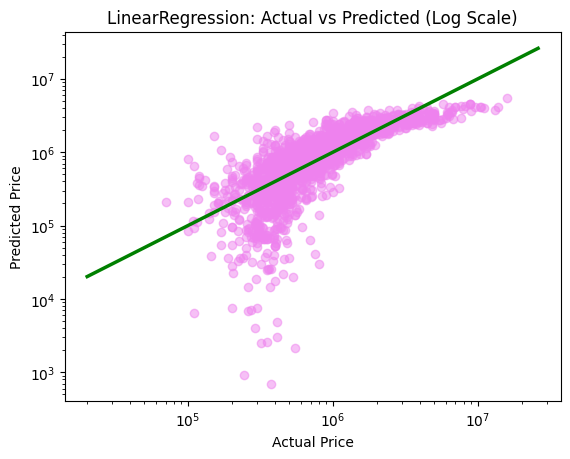

In [22]:
# Assuming final_df is already defined and loaded
X = final_df.drop(columns=['price'])  # Features (excluding the target variable)
y = final_df['price']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

plt.scatter(y_test, y_pred, color='violet', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('LinearRegression: Actual vs Predicted (Log Scale)')
plt.show()



Random Forest Regression

Mean Squared Error: 97486295831.05
Mean Absolute Error: 127227.85
R-squared: 0.93


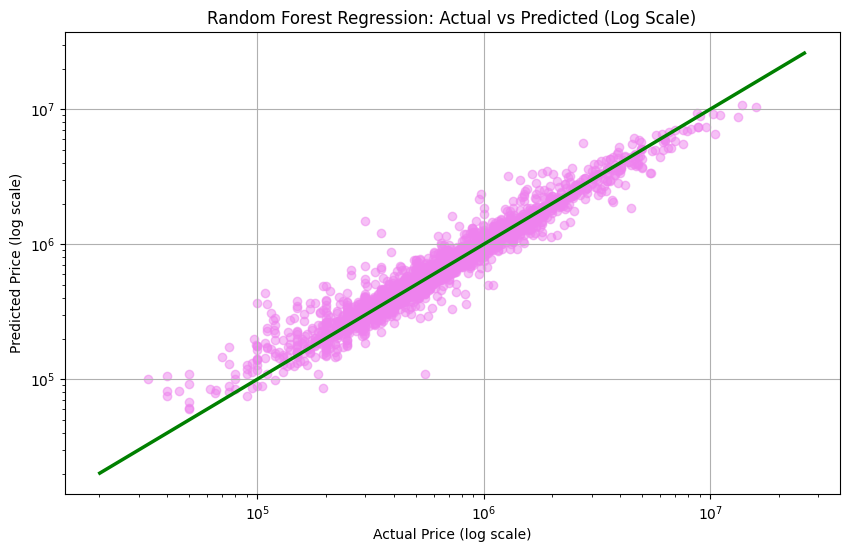

In [23]:
X = final_df.drop(columns=['price'])
y = final_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestRegressor(n_estimators=300, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='violet', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Random Forest Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()


 Decision Tree Regression:

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error: {mse_tree:.2f}')
print(f'Decision Tree - Mean Absolute Error: {mae_tree:.2f}')
print(f'Decision Tree - R-squared: {r2_tree:.2f}')


Decision Tree - Mean Squared Error: 299468048305.28
Decision Tree - Mean Absolute Error: 182273.96
Decision Tree - R-squared: 0.78


Gradient Boosting Regression:

Gradient Boosting - Mean Squared Error: 76809353253.73
Gradient Boosting - Mean Absolute Error: 130464.52
Gradient Boosting - R-squared: 0.94


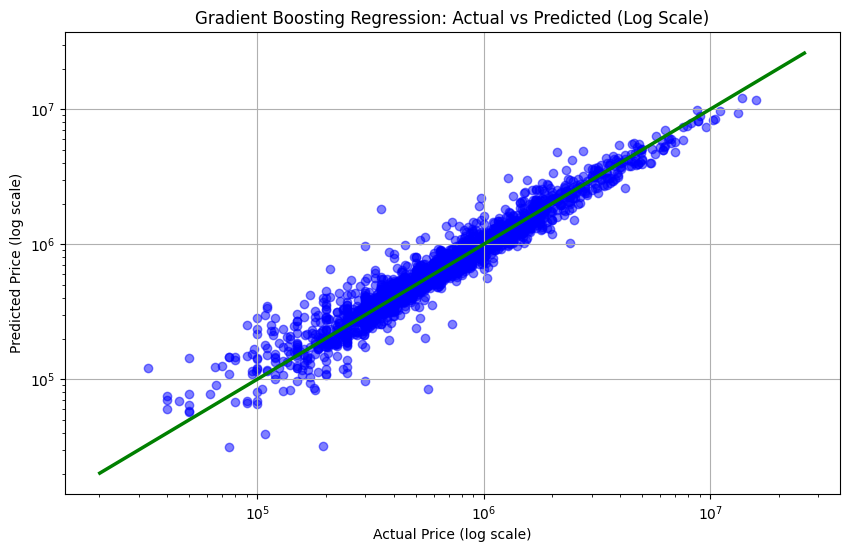

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, random_state=0)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Printing evaluation metrics
print(f'Gradient Boosting - Mean Squared Error: {mse_gb:.2f}')
print(f'Gradient Boosting - Mean Absolute Error: {mae_gb:.2f}')
print(f'Gradient Boosting - R-squared: {r2_gb:.2f}')

# Plotting Actual vs Predicted values on log scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Gradient Boosting Regression: Actual vs Predicted (Log Scale)')
plt.grid(True)
plt.show()


Feature Importance from RandomForest

In [26]:
model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Display importance for each feature
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

Body type: 0.009027911981586612
Number of previous owners: 0.002470753043852533
Seats: 0.015464532955471549
city: 0.00622675348261446
kilometer driven: 0.07737609452218379
Car model: 0.019376415660346993
Year of car manufacture: 0.12207897080798123
Length: 0.19293090400299356
Fuel type: 0.0023843702361976095
Width: 0.4103004456970909
Color: 0.006603831050314837
Brand Name: 0.008355333468823112
Insurance Validity_value: 0.0021729870430943704
Transmission type: 0.030083082774414724
Engine Displacement_value(cc): 0.0951476132730338


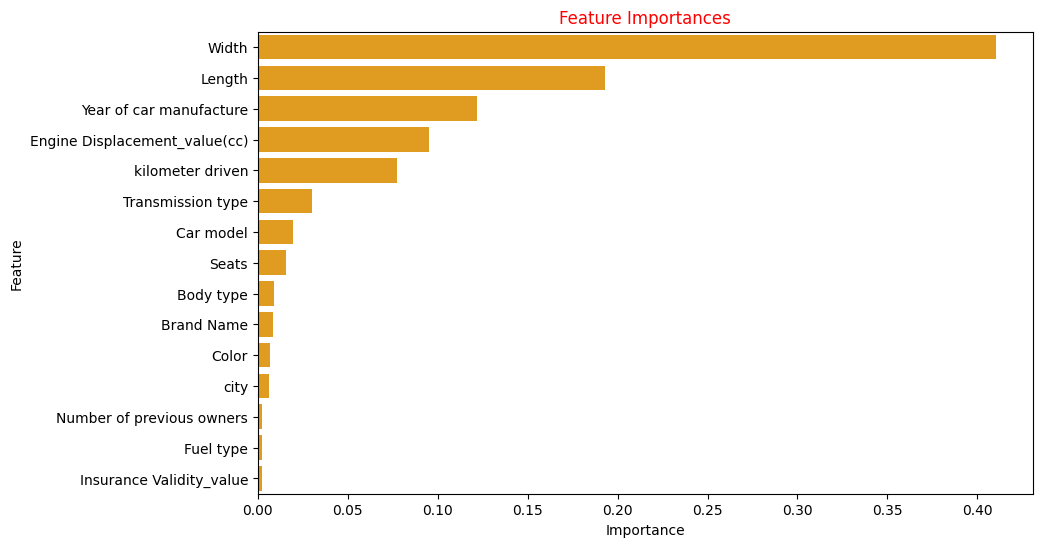

In [27]:
# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df,color='orange')
plt.title('Feature Importances',color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
